In [1]:
import os 

os.environ["ISISROOT"] = "/usgs/cpkgs/anaconda3_macOS/envs/isis3.8.0"

import pysis
from pysis import isis
from pysis.exceptions import ProcessError

import knoten
from knoten import vis

import json

import ale
from ale import util
from ale.drivers.mex_drivers import MexHrscPds3NaifSpiceDriver
from ale.formatters.usgscsm_formatter import to_usgscsm

from IPython.display import Image

import plotly
plotly.offline.init_notebook_mode(connected=True)

/Users/jmapel/ale/ale/__init__.py:22: UserWarning:

ALESPICEROOT environment variable not set, Spice Drivers will not function correctly



In [2]:
# url = 'https://pds-imaging.jpl.nasa.gov/data/mro/mars_reconnaissance_orbiter/ctx/mrox_3365/data/K11_057871_1602_XN_19S163W.IMG'

# !wget -N -P data/ {url}
# fileName = 'data/' + os.path.split(url)[1]
fileName = 'data/h5270_0000_nd2.img'

In [3]:
# Set the output location of the resulting .cub
cub_loc = os.path.splitext(fileName)[0] + '.cub'

try: 
    isis.hrsc2isis(from_=fileName, to=cub_loc)
except ProcessError as e:
    print(e.stderr)

try:
    isis.spiceinit(from_=cub_loc, shape='ellipsoid', ckpredicted=True, spkpredicted=True)
except ProcessError as e:
    print(e.stderr)
    
kernels = ale.util.generate_kernels_from_cube(cub_loc, expand=True)

usgscsm_str = ale.loads(fileName, props={'kernels': kernels}, formatter="usgscsm", verbose=False)

csm_isd = os.path.splitext(fileName)[0] + '.json'
with open(csm_isd, 'w') as isd_file:
    isd_file.write(usgscsm_str)

In [6]:
csmisis_diff_lv_plot, csmisis_diff_ephem_plot, external_orientation_data = vis.external_orientation_diff(csm_isd, cub_loc, 10, 50, 600, 600)

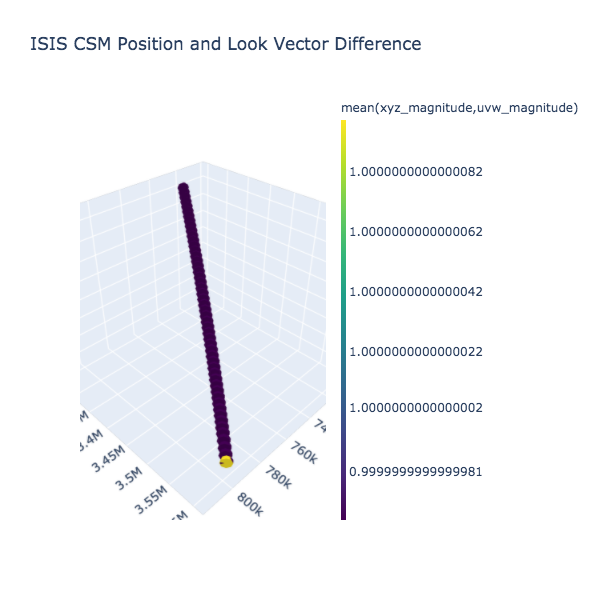

In [7]:
csmisis_diff_lv_plot_bytes = csmisis_diff_lv_plot.to_image(format="png")
csmisis_diff_ephem_plot_bytes = csmisis_diff_ephem_plot.to_image(format="png")
Image(csmisis_diff_lv_plot_bytes)

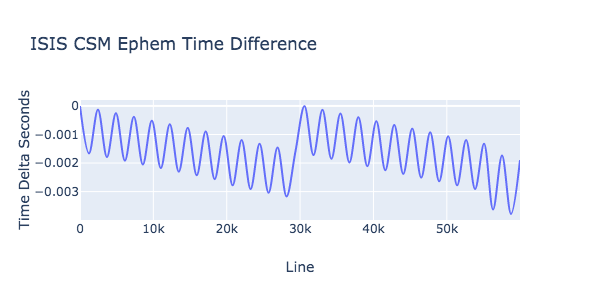

In [8]:
Image(csmisis_diff_ephem_plot_bytes)

In [9]:
external_orientation_data[['diffx', 'diffy', 'diffz', 'diffu', 'diffv', 'diffw']].describe()

,diffx,diffy,diffz,diffu,diffv,diffw
count,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02
mean,-0.557758,-2.551644,6.281479,1.430113e-06,6.615309e-06,-1.980350e-05
std,0.338322,1.541151,3.911946,8.647726e-07,4.063520e-06,1.200682e-05
min,-1.183688,-5.194330,-0.000048,-1.187537e-10,-1.465176e-10,-4.144454e-05
25%,-0.830118,-3.817171,2.950378,6.963677e-07,3.236484e-06,-3.013584e-05
50%,-0.573754,-2.550869,6.506924,1.419057e-06,6.652555e-06,-2.007733e-05
75%,-0.263453,-1.172353,9.353923,2.146823e-06,9.534250e-06,-9.651897e-06
max,0.000022,0.000089,15.081273,2.971260e-06,1.393120e-05,4.621041e-10


In [10]:
isis2csm_plot, csm2isis_plot, isiscsm_plotlatlon, isiscsm_plotbf, isis2csm_data, csm2isis_data, isiscsm_latlondata, isiscsm_bfdata = vis.reprojection_diff(csm_isd, cub_loc, 10, 50, 500, 500)

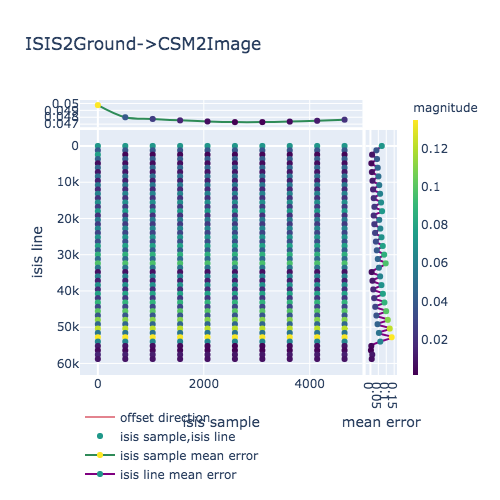

In [11]:
Image(isis2csm_plot.to_image())

In [12]:
isis2csm_data[['diff sample', 'diff line']].describe()

,diff sample,diff line
count,500.000000,500.000000
mean,0.000371,0.047503
std,0.002574,0.032645
min,-0.008779,-0.001601
25%,-0.000951,0.020481
50%,0.000120,0.045870
75%,0.001529,0.069485
max,0.011234,0.134727


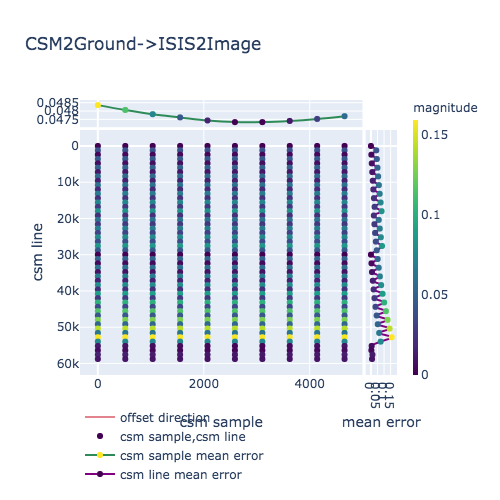

In [13]:
Image(csm2isis_plot.to_image())

In [14]:
csm2isis_data[['diff sample', 'diff line']].describe()

,diff sample,diff line
count,500.000000,500.000000
mean,-0.000388,-0.047407
std,0.002659,0.037886
min,-0.011358,-0.159099
25%,-0.001542,-0.068011
50%,-0.000098,-0.043969
75%,0.000889,-0.014194
max,0.008867,0.001591


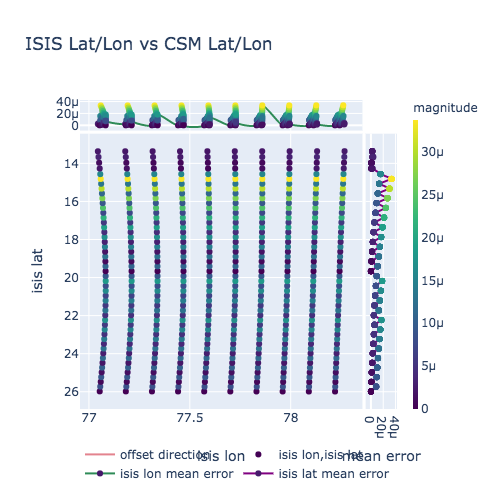

In [15]:
Image(isiscsm_plotlatlon.to_image())

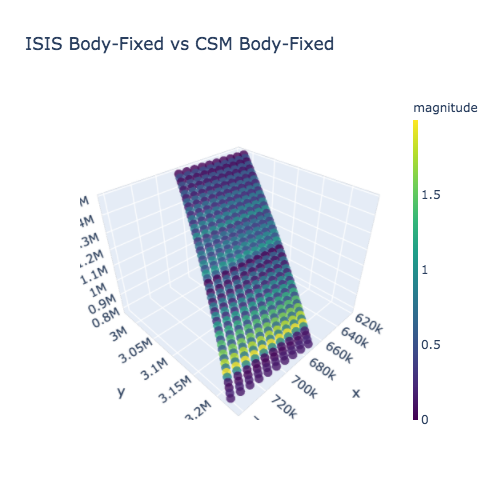

In [16]:
Image(isiscsm_plotbf.to_image())

In [17]:
isiscsm_bfdata[['diffx', 'diffy', 'diffz']].describe()

,diffx,diffy,diffz
count,500.000000,500.000000,500.000000
mean,1.817929,-0.189844,0.561399
std,0.549503,0.136934,0.454697
min,-2.375021,-0.519870,-0.022970
25%,1.853890,-0.297517,0.170206
50%,1.909870,-0.180877,0.514386
75%,1.967756,-0.068839,0.814984
max,2.476831,0.034071,1.925105
